In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
#Import libraries and load dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
df = pd.read_csv('/content/drive/MyDrive/Project /Final Projects/creditcard.csv')

In [41]:
#Get the number of rows in the DataFrame df
df.shape[0]

284807

In [42]:
# Displaying the column names of the DataFrame df
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [43]:
# Splitting the dataset into training, validation, and testing sets
y = df.Class
x = df.drop(['Class','Time','Amount'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=True, random_state=8)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.17, random_state=8)

**Plotting the distribution of features in fraudulent and non-fraudulent transactions using histograms and KDE plots**

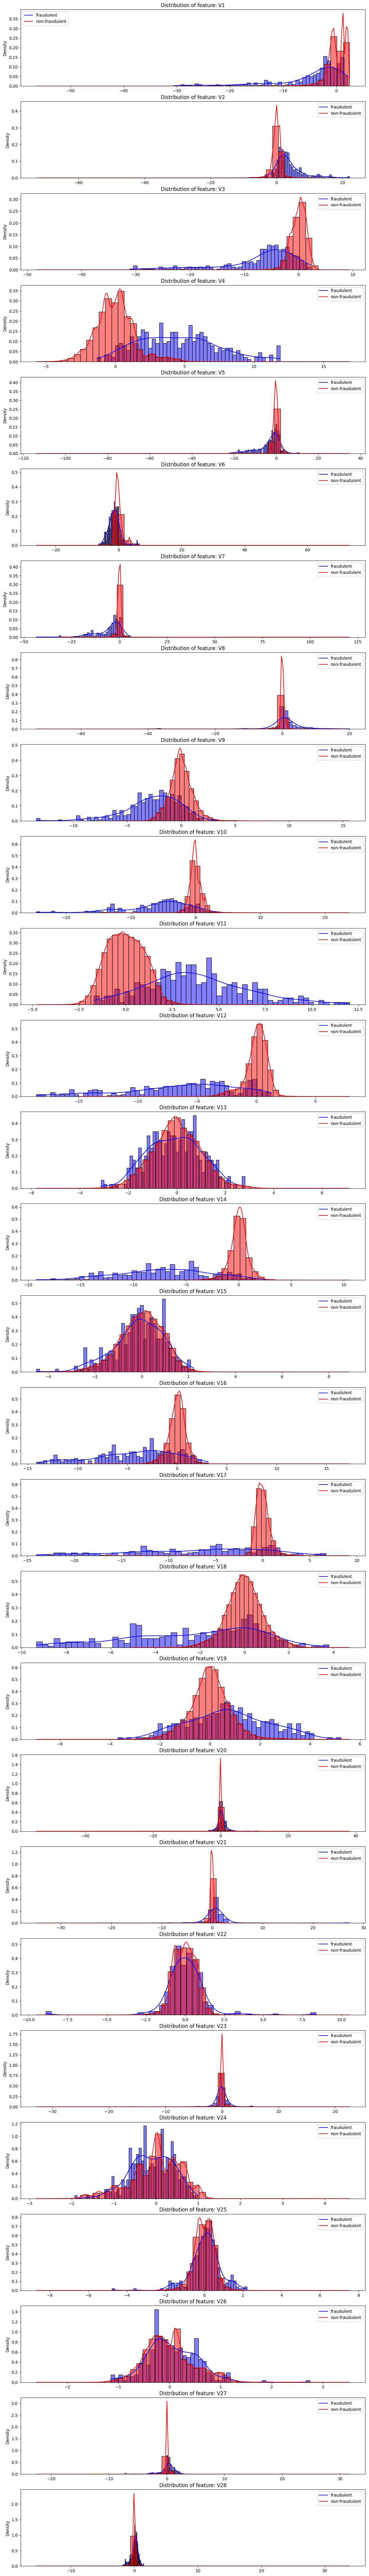

In [45]:
import matplotlib.gridspec as gridspec
features = [f for f in df.columns if 'V' in f]
nplots = np.size(features)
plt.figure(figsize=(15, 4*nplots))
gs = gridspec.GridSpec(nplots, 1)
# Looping through each feature and creating histograms for fraudulent and non-fraudulent transactions
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.histplot(X_train[feat][y_train==1], stat="density", kde=True, color="blue", bins=50)
    sns.histplot(X_train[feat][y_train==0], stat="density", kde=True, color="red", bins=50)
    ax.legend(['fraudulent', 'non-fraudulent'], loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

**Gaussian model with Single feature**

In [46]:
# Fitting a Gaussian Mixture Model (GMM) with 1 component to the feature 'V1' from the training data X_train.
from sklearn.mixture import GaussianMixture
m1 = GaussianMixture(n_components=1, random_state=0).fit(np.array(X_train["V1"]).reshape(-1,1))

In [47]:
# Retrieving the mean(s) of the Gaussian component(s) learned by the Gaussian Mixture Model 'm1'
m1.means_

array([[-0.00010136]])

In [48]:
# Evaluating the performance of the Gaussian Mixture Model (GMM) 'm1' on feature 'V1' using ROC AUC score.
from sklearn import metrics
y_pred = m1.score_samples(np.array(X_train["V1"]).reshape(-1,1))
auc = metrics.roc_auc_score(y_train, y_pred)
print(auc)

0.2840387893811762


In [49]:
# Evaluating the performance of Gaussian Mixture Models (GMMs) with 1 component on each feature in x using ROC AUC scores for both training and validation sets.
auc_train = []
auc_val = []
# Looping through each column in x (features)
for i in x.columns:
    temp_model = GaussianMixture(n_components=1, random_state=0).fit(np.array(X_train[i]).reshape(-1,1))
    train_pred = temp_model.score_samples(np.array(X_train[i]).reshape(-1,1))
    val_pred = temp_model.score_samples(np.array(X_val[i]).reshape(-1,1))
    auc_train.append(metrics.roc_auc_score(y_train, train_pred))
    auc_val.append(metrics.roc_auc_score(y_val, val_pred))
print(auc_train)
print()
print(auc_val)

[0.2840387893811762, 0.1470806418021013, 0.11561867431019549, 0.11405269429553835, 0.23204508720664002, 0.2723423269590235, 0.13658589818280786, 0.22200500442005477, 0.189687117755203, 0.07986832395064362, 0.09593031439230751, 0.09502906966896564, 0.43461689503086254, 0.050795814741635276, 0.4680320919689737, 0.09314561849339262, 0.07107734173516768, 0.21058411956915699, 0.24680779944438036, 0.26215394500705996, 0.18188424437270498, 0.4471739659861035, 0.3049282615916212, 0.519466887503478, 0.4311962360976559, 0.4846278262695914, 0.17811521183903378, 0.19489113887116985]

[0.29973032713614756, 0.1653639892347266, 0.15747368345118745, 0.10305699379079133, 0.22321320687683838, 0.27311290612486827, 0.13191367342411797, 0.16907695054454558, 0.23717776467285484, 0.0896557072239986, 0.10997314693083307, 0.08688503796520222, 0.4619873074613299, 0.03378966117762761, 0.4931737177764673, 0.11493197763506635, 0.06715401350287976, 0.18189723215611447, 0.2850675414503302, 0.23597427587786451, 0.146

In [50]:
# Creating a DataFrame auc_all to store ROC AUC scores for training and validation sets
auc_all = pd.DataFrame({'Train':auc_train, 'Val':auc_val})

In [51]:
# Assuming auc_all is a DataFrame with a column named 'Val'
top_3 = auc_all.sort_values(by="Val").index[:3]
best_features = ["V" + str(i + 1) for i in top_3]
# Print the feature indices and feature names
for i in top_3:
    print(i + 1)
best_features

14
17
12


['V14', 'V17', 'V12']

In [52]:
# Select and display the rows from X_train where y_train is 0, for the best features
X_train[best_features][y_train == 0]

,V14,V17,V12
233663,-0.284575,-0.935608,-0.104524
125990,1.444163,0.314241,0.676803
269209,0.308521,-0.837226,-0.455352
258725,0.549098,0.271195,-0.558690
203194,0.528264,-0.566302,0.456639
...,...,...,...
204753,-0.386158,0.473331,-0.488890
162087,-0.395766,0.006138,-0.238005
276301,1.687330,0.729648,0.772421
272997,-0.145976,0.962849,0.497778


In [53]:
y_train

233663    0
125990    0
269209    0
258725    0
203194    0
         ..
204753    0
162087    0
276301    0
272997    0
168532    0
Name: Class, Length: 200930, dtype: int64

In [54]:
# Fit GMM to training data where y_train is 0
m1 = GaussianMixture(n_components=1, random_state=0).fit(X_train[best_features][y_train==0].values)
# Score samples in validation data
y_pred = m1.score_samples(X_val[best_features].values)
# Classify based on scores
pred_classes = []
for i in y_pred:
    if(i > -50):
        pred_classes.append(0)
    else:
        pred_classes.append(1)
# Compute and print AUC
auc = metrics.roc_auc_score(y_val, y_pred)
print(auc)
# Compute and print precision, recall, and F1 score
print("Precision:", metrics.precision_score(y_val, pred_classes))
print("Recall:", metrics.recall_score(y_val, pred_classes))
print("F1 score:", metrics.f1_score(y_val, pred_classes))


0.04296160437920838
Precision: 0.6781609195402298
Recall: 0.7283950617283951
F1 score: 0.7023809523809522


In [55]:
#Evaluate performance on test set
y_pred_test = m1.score_samples(X_test[best_features].values)
# Classify based on scores for test set
pred_classes_test = []
for i in y_pred_test:
    if i > -50:
        pred_classes_test.append(0)
    else:
        pred_classes_test.append(1)
# Compute and print precision, recall, and F1 score for test set
print("Test Precision:", metrics.precision_score(y_test, pred_classes_test))
print("Test Recall:", metrics.recall_score(y_test, pred_classes_test))
print("Test F1 Score:", metrics.f1_score(y_test, pred_classes_test))

Test Precision: 0.7341772151898734
Test Recall: 0.7837837837837838
Test F1 Score: 0.7581699346405228
